In [1]:
import keras
from keras.datasets import fashion_mnist
from keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report



Fashion MNIST is a dataset from online fashion retailer Zalando consisting of a training set of 60,000 examples and a test set of 10,000 examples from one of 10 classes:

| Label | Description |
|-------|-------------|
| 0     | T-shirt/top |
| 1     | Trouser     |
| 2     | Pullover    |
| 3     | Dress       |
| 4     | Coat        |
| 5     | Sandal      |
| 6     | Shirt       |
| 7     | Sneaker     |
| 8     | Bag         |
| 9	    | Ankle boot  |

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel. This pixel-value is an integer between 0 and 255.

The goal is to predict the clothing category from the pixel-values from an image.

The dataset can be directly loaded using a function from the keras library.



In [2]:
(X_train,y_train), (X_test,y_test) = fashion_mnist.load_data()

Let's check the size of the training and testing sets.


In [3]:
print('X training shape:',X_train.shape)
print('X test shape:',X_test.shape)
print('y training shape:',y_train.shape)
print('y test shape:',y_test.shape)

X training shape: (60000, 28, 28)
X test shape: (10000, 28, 28)
y training shape: (60000,)
y test shape: (10000,)


Each example is composed by 28 rows and 28 columns that contain the 784 pixel values for an image. For example, these are the two first rows for a single example.



In [4]:
X_train[1][:2]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0]], dtype=uint8)

The y arrays are one-dimensional vectors with the class labels.

In [5]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

We can display the first images in the training data to get an idea.

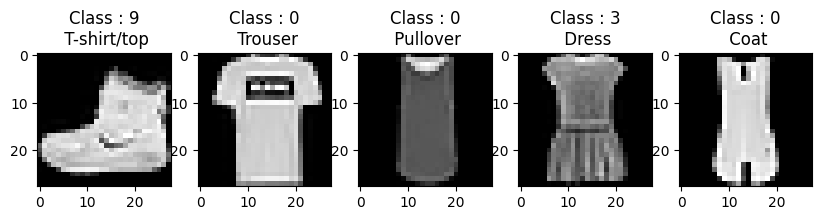

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']
plt.figure(figsize=[10,10])

for i in range(5):
  n = int('15' + str(i + 1))
  plt.subplot(n)
  plt.imshow(X_train[i], cmap='gray')
  plt.title("Class : {}\n {}".format(y_train[i], class_names[i]))


We scale the data into the 0-1 range.

In [7]:
X_train = X_train/255.0
X_test = X_test/255.0

The network cannot work directly with categorical values, so we must convert them to numerical generating one boolean column (0/1) for each class category.

In [8]:
y_train_enc = to_categorical(y_train)
y_test_enc = to_categorical(y_test)

In [9]:
y_train_enc

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Now, we split the training data into a training and a validation set using the `train_test_split` function from `sklearn` as usual.



In [10]:
x_train,x_val,y_train,y_val = train_test_split(X_train, y_train_enc, test_size=0.2, random_state=35, stratify = y_train_enc)

Let's check the shapes of the training and validation datasets.

In [11]:
print('X training shape:',x_train.shape)
print('X validation shape:',x_val.shape)
print('y training shape:',y_train.shape)
print('y validation shape:',y_val.shape)

X training shape: (48000, 28, 28)
X validation shape: (12000, 28, 28)
y training shape: (48000, 10)
y validation shape: (12000, 10)


## 2-layer Multilayer Perceptron

---

**Build a keras model that represents a two-layer MLP, i.e., an input layer, a single hidden layer and an output layer.**

* **The input layer is a Flatten layer to convert the input into a single vector:**

> `Flatten(input_shape=(28,28,1)`

* **Add a Dense layer with 128 units and ReLu activation function as the hidden layer.**

* **Add a Dense layer with 10 units (one per class label) and softmax activation function as the output layer.**

**Compile the model and display the summary.**

---

In [12]:
# Build the model
model = Sequential()

# Input layer
model.add(Flatten(input_shape=(28, 28, 1)))

# Hidden layer
model.add(Dense(128, activation='relu'))

# Output layer
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display model summary
model.summary()

/Users/magnus/development/education/ai_applied_to_engineering/assignment_3/venv/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

---

**Train (fit) the model using a batch size of 256, 15 epochs and using the validation sets obtained above (x_val,y_val) as validation data.**

---

In [13]:
model_history = model.fit(x=x_train, y=y_train, validation_data=(x_val, y_val), epochs=15, batch_size=256)

Epoch 1/15
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6966 - loss: 0.9167 - val_accuracy: 0.8335 - val_loss: 0.4815
Epoch 2/15
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8465 - loss: 0.4491 - val_accuracy: 0.8422 - val_loss: 0.4490
Epoch 3/15
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8612 - loss: 0.4009 - val_accuracy: 0.8641 - val_loss: 0.3945
Epoch 4/15
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8701 - loss: 0.3680 - val_accuracy: 0.8609 - val_loss: 0.3895
Epoch 5/15
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8764 - loss: 0.3510 - val_accuracy: 0.8706 - val_loss: 0.3718
Epoch 6/15
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8843 - loss: 0.3275 - val_accuracy: 0.8729 - val_loss: 0.3659
Epoch 7/15
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8819 - loss: 0.3246 - val_accuracy: 0.8688 - val_loss: 0.3790
Epoch 8/15
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8878 - loss: 0.3125 - val_accuracy: 0.

---

**Plot the loss and accuracy for the training and validation data**

**You can use the following code. It assumes that the object returning by the fit is named `model_history`, you can change the name.**

**Study the plots. Does the model overfit the data? Check if the behavior suggests that training should stop earlier or more epochs are needed. In that case, modify the number of epochs and train the model again.**

---

In [14]:
# As we will use this plotting a lot throughout this project, we make it into a function 
def plot_loss_and_accuracy(model_history):
    plt.figure(figsize=[12,4])

    accuracy = model_history.history['accuracy']
    val_accuracy = model_history.history['val_accuracy']
    loss = model_history.history['loss']
    val_loss = model_history.history['val_loss']

    plt.subplot(1, 2, 1)

    plt.ylabel('Loss')
    plt.plot(loss,label='Training loss');
    plt.plot(val_loss,label='Validation loss');
    plt.legend(loc='upper left')

    plt.grid()

    plt.subplot(1, 2, 2)

    plt.ylabel('Accuracy')
    plt.plot(accuracy,label='Training acc')
    plt.plot(val_accuracy,label='Validation acc')
    plt.legend(loc='upper left');

    plt.grid()


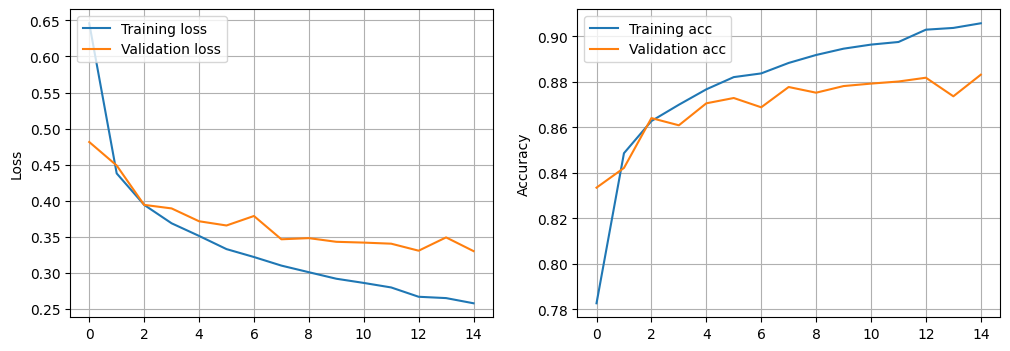

In [15]:
plot_loss_and_accuracy(model_history)

We see that the training loss decreases steadily, while the validation loss reaches a much flatter curve earlier (almost stable). Additionally, the training accuracy increases consistently, whereas the validation accuracy fluctuates and reaches plateaus. These observations suggest overfitting of the model, happeing around epoch 7.

---

**Evaluate your final model on the test data using the `evaluate` method. Check the loss and the accuracy.**

---

In [17]:
model.evaluate(x=X_test, y=y_test_enc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step - accuracy: 0.8840 - loss: 0.3315


[0.33055412769317627, 0.8834999799728394]

The loss of the function is 0.342, and the accuracy of the model is 0.878.

---

**Use the ``classification_report`` function from ``scikit-learn`` to get the classification metrics on each class and see which classes are most frequently misclassified.**

**You can use the following code, substituting the `model` variable for the one containing your fitted model.**

---

In [18]:
predict_test = model.predict(X_test);
y_pred = np.argmax(predict_test,axis=1)
print(classification_report(y_test, y_pred, target_names=class_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step
              precision    recall  f1-score   support

 T-shirt/top       0.83      0.84      0.83      1000
     Trouser       0.98      0.98      0.98      1000
    Pullover       0.77      0.83      0.80      1000
       Dress       0.91      0.86      0.88      1000
        Coat       0.80      0.81      0.80      1000
      Sandal       0.96      0.97      0.97      1000
       Shirt       0.71      0.69      0.70      1000
     Sneaker       0.94      0.96      0.95      1000
         Bag       0.97      0.96      0.97      1000
  Ankle boot       0.97      0.94      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



The item that is misclassified the most is the 'Shirt' class. The three next classes are the 'T-shirt/top', 'Pullover' and 'Coat'. We notice that these are all garments for the upper body, with similar shape. It makes sense that an image recognition model like this gets confused on such similar garments. 

## Convolutional Neural Networks

---

**Create a CNN model with the following layers:**

* **A convolutional layer with 32 filters, a 3x3 kernel size, a ReLu activation function and `padding='same'`**

* **A max-pooling layer with a 2x2 pool size**

* **A flatten layer**

* **A dense layer with 128 units and a ReLu activation function**

* **A dense layer with 10 units and a softmax activation function**

**Since the convolutional layer is the first, you must specify the size of the input as a parameter with**

> `input_shape=(28, 28, 1)`

**Compile the model and display the summary.**

---

In [19]:
# Build the model
model_2 = Sequential()

# Convolutional layer
model_2.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(28, 28, 1)))

# Max-pooling layer
model_2.add(MaxPooling2D(pool_size=(2,2)))

# Flatten layer
model_2.add(Flatten(input_shape=(28, 28, 1)))

# Dense layer 1
model_2.add(Dense(128, activation='relu'))

# Dense layer 2
model_2.add(Dense(10, activation='softmax'))

# Compile the model
model_2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display model summary
model_2.summary()

/Users/magnus/development/education/ai_applied_to_engineering/assignment_3/venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/magnus/development/education/ai_applied_to_engineering/assignment_3/venv/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 804,554 (3.07 MB)

 Trainable params: 804,554 (3.07 MB)

 Non-trainable params: 0 (0.00 B)

---

**Train (fit) the model using a batch size of 256, 25 epochs and using the validation sets obtained above (x_val,y_val) as validation data.**

---

In [20]:
model_history_2 = model_2.fit(x=x_train, y=y_train, validation_data=(x_val, y_val), epochs=25, batch_size=256)

Epoch 1/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.7493 - loss: 0.7655 - val_accuracy: 0.8737 - val_loss: 0.3686
Epoch 2/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.8782 - loss: 0.3455 - val_accuracy: 0.8871 - val_loss: 0.3215
Epoch 3/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.8956 - loss: 0.2932 - val_accuracy: 0.8992 - val_loss: 0.2951
Epoch 4/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9083 - loss: 0.2624 - val_accuracy: 0.8992 - val_loss: 0.2844
Epoch 5/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.9156 - loss: 0.2339 - val_accuracy: 0.9058 - val_loss: 0.2617
Epoch 6/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.9251 - loss: 0.2112 - val_accuracy: 0.9096 - val_loss: 0.2563
Epoch 7/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.9289 - loss: 0.1993 - val_accuracy: 0.9101 - val_loss: 0.2512
Epoch 8/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.9326 - loss: 0.1880 - val_accu

---

**Plot the loss and accuracy for the training and validation data.**

**Study the plots. Does the model overfit the data?**

---

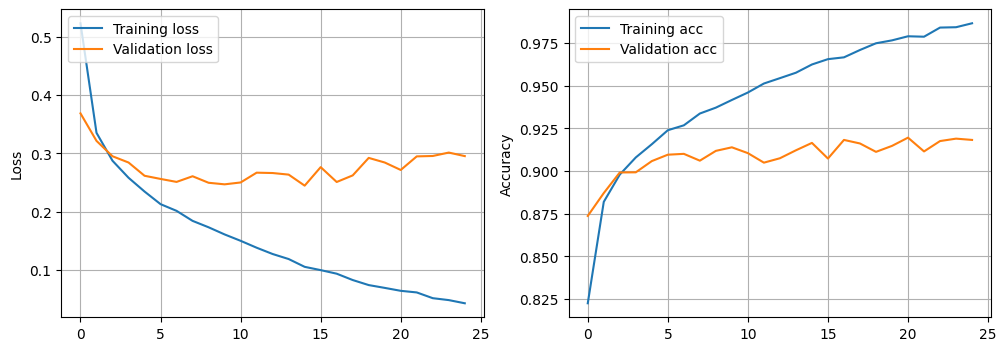

In [21]:
plot_loss_and_accuracy(model_history_2)

For the following two reasons the model seems to be overfitting:
- Traning loss continues to decrease while validation loss stabilizes (actually slightly increases).
- Traning accuracy continues to increase while validation accuracy stabilizes.

We therefore add the param `callbacks=EarlyStopping(monitor='val_loss',patience=3)` to the `fit` method in the next code block.

### Early stopping

---

**If you think that the training should have stopped earlier to avoid overfitting, you can apply early stopping adding the following to the fit call:**

> `callbacks=EarlyStopping(monitor='val_loss',patience=3)`

**Plot the loss and accuracy for the training and validation data for the new model.**

---

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 804,554 (3.07 MB)

 Trainable params: 804,554 (3.07 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.7424 - loss: 0.7609 - val_accuracy: 0.8622 - val_loss: 0.3968
Epoch 2/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.8729 - loss: 0.3612 - val_accuracy: 0.8807 - val_loss: 0.3410
Epoch 3/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.8891 - loss: 0.3134 - val_accuracy: 0.8943 - val_loss: 0.3063
Epoch 4/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9004 - loss: 0.2795 - val_accuracy: 0.8949 - val_loss: 0.2972
Epoch 5/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9069 - loss: 0.2581 - val_accuracy: 0.9035 - val_loss: 0.2754
Epoch 6/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9164 - loss: 0.2329 - val_accuracy: 0.9041 - val_loss: 0.2728
Epoch 7/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.9215 - loss: 0.2190 - val_accuracy: 0.9078 - val_loss: 0.2635
Epoch 8/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9273 - loss: 0.2012 - val_accu

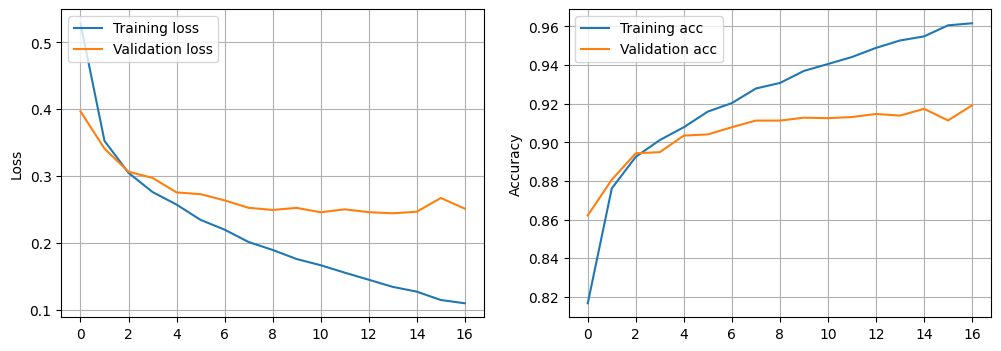

In [22]:
# Build the model
model_3 = Sequential()

# Convolutional layer
model_3.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(28, 28, 1)))

# Max-pooling layer
model_3.add(MaxPooling2D(pool_size=(2,2)))

# Flatten layer
model_3.add(Flatten(input_shape=(28, 28, 1)))

# Dense layer 1
model_3.add(Dense(128, activation='relu'))

# Dense layer 2
model_3.add(Dense(10, activation='softmax'))

# Compile the model
model_3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display model summary
model_3.summary()

# Fit the model
model_history_3 = model_3.fit(
    x=x_train, y=y_train, 
    validation_data=(x_val, y_val), 
    epochs=25, 
    batch_size=256, 
    callbacks=EarlyStopping(monitor='val_loss',patience=3)
)

plot_loss_and_accuracy(model_history_3)

In [23]:
eval_2 = model_2.evaluate(x=X_test, y=y_test_enc)
eval_3 = model_3.evaluate(x=X_test, y=y_test_enc)

print(f'Model 2 loss={round(eval_2[0], 3)} and accuracy={round(eval_2[1],3)}')
print(f'Model 3 loss={round(eval_3[0], 3)} and accuracy={round(eval_3[1],3)}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9129 - loss: 0.3354
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9155 - loss: 0.2753
Model 2 loss=0.327 and accuracy=0.913
Model 3 loss=0.272 and accuracy=0.915


---

**Select your final model with or without early stopping and apply it on the test data. Check the loss and the accuracy.**

**Print a classification report.**

---

From the new plots, we see that the model with early stopping shows significantly less signs of overfitting than the one without early stopping. In addition, the new model (with early stopping) has lower loss (albeit insignificantly lower accuray).

We therefore choose to continue with the model with early stopping, as it demonstrates better generalization performance and reduced overfitting.

In [24]:
model_3.evaluate(x=X_test, y=y_test_enc)

predict_test_3 = model_3.predict(X_test);
y_pred_3 = np.argmax(predict_test_3,axis=1)
print(classification_report(y_test, y_pred_3, target_names=class_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9155 - loss: 0.2753
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.90      0.82      0.86      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.88      0.86      0.87      1000
       Dress       0.88      0.94      0.91      1000
        Coat       0.86      0.88      0.87      1000
      Sandal       0.98      0.97      0.98      1000
       Shirt       0.77      0.78      0.77      1000
     Sneaker       0.94      0.98      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.98      0.95      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.92      0.91      0.91     10000
weighted avg       0.92      0.91      0.91     10000



The new model, `model_3`, has consistently better scores comared to the first (`model`). However, the same observations regarding upper body garments hold for this model: such images are classified poorer than the rest.

### Adding dropout to avoid overfitting

---

**A way to avoid overfitting is to add dropout layers. Add one dropout layer with a 0.25 rate to the previous model. Place it after the max-pooling layer. Add another after the first dense layer**

**Train (fit) the model using a batch size of 256, 25 epochs and using the validation sets obtained above (x_val,y_val) as validation data.**

**Plot the loss and accuracy for the training and validation data for the new model.**

**You can also check how the dropout works with and without early stopping.**

---

In [25]:
# Without early stopping
# Build the model
model_4 = Sequential()

# Convolutional layer
model_4.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(28, 28, 1)))

# Max-pooling layer
model_4.add(MaxPooling2D(pool_size=(2,2)))

# Dropout layer after max-pooling
model_4.add(Dropout(0.25))

# Flatten layer
model_4.add(Flatten())

# Dense layer 1
model_4.add(Dense(128, activation='relu'))

# Dropout layer after dense layer 1
model_4.add(Dropout(0.25))

# Dense layer 2
model_4.add(Dense(10, activation='softmax'))

# Compile the model
model_4.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history_4 = model_4.fit(x_train, y_train,
                    batch_size=256,
                    epochs=25,
                    validation_data=(x_val, y_val))

Epoch 1/25


/Users/magnus/development/education/ai_applied_to_engineering/assignment_3/venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.7178 - loss: 0.8330 - val_accuracy: 0.8673 - val_loss: 0.3892
Epoch 2/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.8682 - loss: 0.3674 - val_accuracy: 0.8866 - val_loss: 0.3201
Epoch 3/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.8828 - loss: 0.3214 - val_accuracy: 0.8963 - val_loss: 0.2923
Epoch 4/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9002 - loss: 0.2823 - val_accuracy: 0.9005 - val_loss: 0.2801
Epoch 5/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9035 - loss: 0.2646 - val_accuracy: 0.9063 - val_loss: 0.2619
Epoch 6/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9083 - loss: 0.2501 - val_accuracy: 0.9068 - val_loss: 0.2574
Epoch 7/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.9134 - loss: 0.2376 - val_accuracy: 0.9130 - val_loss: 0.2507
Epoch 8/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9211 - loss: 0.2166 - val_accuracy: 0.910

---

**Train (fit) the model using a batch size of 256, 25 epochs and using the validation sets obtained above (x_val,y_val) as validation data.**

---

In [26]:
# With early stopping
# Build the model
model_5 = Sequential()

# Convolutional layer
model_5.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(28, 28, 1)))

# Max-pooling layer
model_5.add(MaxPooling2D(pool_size=(2,2)))

# Dropout layer after max-pooling
model_5.add(Dropout(0.25))

# Flatten layer
model_5.add(Flatten())

# Dense layer 1
model_5.add(Dense(128, activation='relu'))

# Dropout layer after dense layer 1
model_5.add(Dropout(0.25))

# Dense layer 2
model_5.add(Dense(10, activation='softmax'))

# Compile the model
model_5.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history_5 = model_5.fit(x_train, y_train,
                    batch_size=256,
                    epochs=25,
                    validation_data=(x_val, y_val),
                    callbacks=EarlyStopping(monitor='val_loss',patience=3))

Epoch 1/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.7246 - loss: 0.8086 - val_accuracy: 0.8683 - val_loss: 0.3710
Epoch 2/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.8689 - loss: 0.3691 - val_accuracy: 0.8844 - val_loss: 0.3263
Epoch 3/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.8851 - loss: 0.3172 - val_accuracy: 0.8945 - val_loss: 0.2935
Epoch 4/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.8995 - loss: 0.2811 - val_accuracy: 0.8998 - val_loss: 0.2816
Epoch 5/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9023 - loss: 0.2677 - val_accuracy: 0.9026 - val_loss: 0.2726
Epoch 6/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9114 - loss: 0.2448 - val_accuracy: 0.9087 - val_loss: 0.2516
Epoch 7/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.9154 - loss: 0.2310 - val_accuracy: 0.9077 - val_loss: 0.2523
Epoch 8/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.9212 - loss: 0.2142 - val_accu

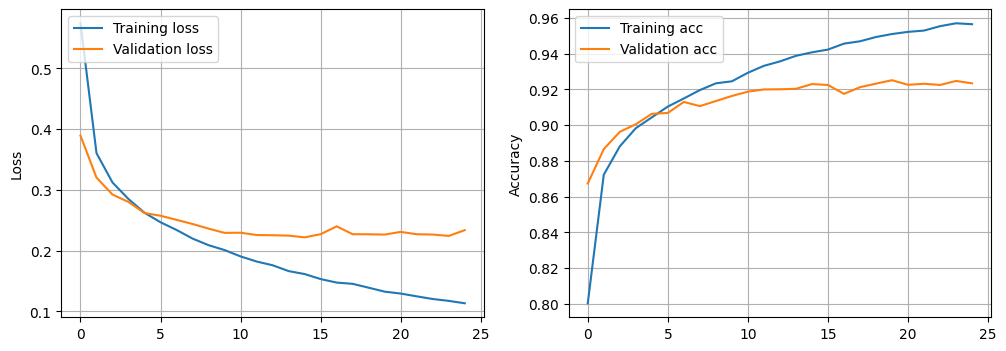

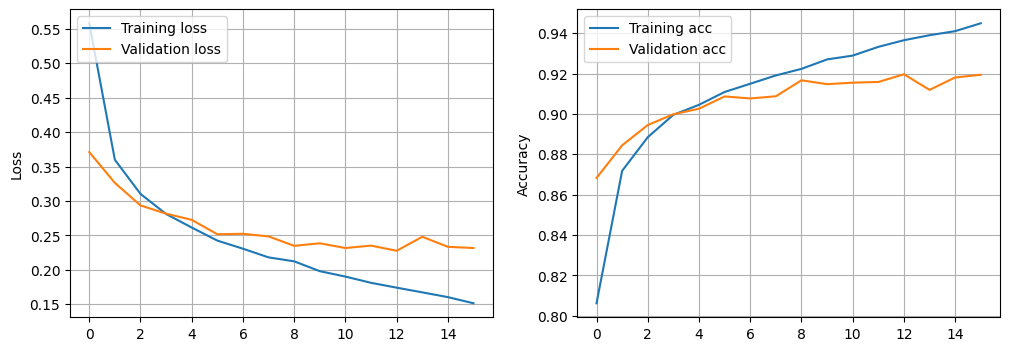

In [27]:
plot_loss_and_accuracy(history_4)

plot_loss_and_accuracy(history_5)

---

**Select the model with or without early stopping (but with dropout) and evaluate it on test data**

**Print the classification report**

---

We observe that the model with early stopping (Model 5) shows better generalization and stability compared to the model without early stopping (Model 4). The training loss for Model 5 decreases steadily, and the validation loss stabilizes earlier with fewer fluctuations.

Therefore, we choose to continue with Model 5, as it demonstrates better generalization performance and reduced overfitting.

In [35]:
eval_5 = model_5.evaluate(x=X_test, y=y_test_enc)


predict_test_5 = model_5.predict(X_test);
y_pred_5 = np.argmax(predict_test_5,axis=1)

print(f'\n Model 5 loss={round(eval_5[0], 3)} and accuracy={round(eval_5[1],3)} \n')
print(classification_report(y_test, y_pred_5, target_names=class_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9163 - loss: 0.2475
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

 Model 5 loss=0.243 and accuracy=0.916 

              precision    recall  f1-score   support

 T-shirt/top       0.86      0.88      0.87      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.88      0.84      0.86      1000
       Dress       0.93      0.91      0.92      1000
        Coat       0.84      0.90      0.87      1000
      Sandal       0.99      0.98      0.99      1000
       Shirt       0.76      0.75      0.76      1000
     Sneaker       0.96      0.98      0.97      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.97      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



This new model performs overall slightly better than `model_3`. Still, the misclassifications of upper body garments occur.

---
**Now create a model with the following layers:**

* **A convolutional layer with 32 filters and a 3x3 kernel size, a ReLu activation function and `padding='same'` (input layer)**

* **A max-pooling layer with a 2x2 pooling size**

* **A convolutional layer with 64 filters and a 3x3 kernel size, a ReLu activation function and `padding='same'`**

* **A max-pooling layer with a 2x2 pooling size**

* **A dropout layer with a 0.3 rate**

* **A convolutional layer with 128 filters and a 3x3 kernel size, a ReLu activation function and `padding='same'`**

* **A convolutional layer with 128 filters and a 3x3 kernel size, a ReLu activation function and `padding='same'`**

* **A max-pooling layer with a 2x2 pooling size**

* **A dropout layer with a 0.4 rate**

* **A flatten layer**

* **A dense layer with 512 units**

* **A dropout layer with a 0.25 rate**

* **A dense layer with 10 units and a softmax activation function**

---



In [29]:
# Build the model
model_6 = Sequential()

# Convolutional layer 1
model_6.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(28, 28, 1)))

# Max-pooling layer 1
model_6.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 2
model_6.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))

# Max-pooling layer 2
model_6.add(MaxPooling2D(pool_size=(2,2)))

# Dropout layer 1
model_6.add(Dropout(0.3))

# Convolutional layer 3
model_6.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'))

# Convolutional layer 4
model_6.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'))

# Max-pooling layer 3
model_6.add(MaxPooling2D(pool_size=(2,2)))

# Dropout layer 2
model_6.add(Dropout(0.4))

# Flatten layer
model_6.add(Flatten())

# Dense layer 1
model_6.add(Dense(512, activation='relu'))

# Dropout layer 3
model_6.add(Dropout(0.25))

# Dense layer 2
model_6.add(Dense(10, activation='softmax'))

# Compile the model
model_6.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model_6.summary()

/Users/magnus/development/education/ai_applied_to_engineering/assignment_3/venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 7, 7, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 835,722 (3.19 MB)

 Trainable params: 835,722 (3.19 MB)

 Non-trainable params: 0 (0.00 B)

**Compile the model**

**Train (fit) the model using a batch size of 256, 25 epochs and using the validation sets obtained above (x_val,y_val) as validation data.**

**Plot the loss and accuracy for the training and validation data for the new model.**

**Evaluate the model on the test set**

**To complete the assignment, modify some parameters (number of filters, activation functions, dropout rate) and/or add new layers and check the results**


In [30]:
# Train the model
history_6 = model_6.fit(x_train, y_train,
                    batch_size=256,
                    epochs=25,
                    validation_data=(x_val, y_val))

Epoch 1/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 22s 112ms/step - accuracy: 0.6047 - loss: 1.0572 - val_accuracy: 0.8397 - val_loss: 0.4367
Epoch 2/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 20s 105ms/step - accuracy: 0.8347 - loss: 0.4413 - val_accuracy: 0.8759 - val_loss: 0.3318
Epoch 3/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 22s 116ms/step - accuracy: 0.8694 - loss: 0.3574 - val_accuracy: 0.8863 - val_loss: 0.3066
Epoch 4/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 20s 107ms/step - accuracy: 0.8841 - loss: 0.3095 - val_accuracy: 0.8884 - val_loss: 0.2923
Epoch 5/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 20s 108ms/step - accuracy: 0.8940 - loss: 0.2878 - val_accuracy: 0.8951 - val_loss: 0.2765
Epoch 6/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 21s 109ms/step - accuracy: 0.9020 - loss: 0.2706 - val_accuracy: 0.9059 - val_loss: 0.2484
Epoch 7/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 20s 105ms/step - accuracy: 0.9066 - loss: 0.2494 - val_accuracy: 0.9143 - val_loss: 0.2352
Epoch 8/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 20s 104ms/step - accuracy: 0.9145 - loss: 0

In [36]:
eval_6 = model_6.evaluate(x=X_test, y=y_test_enc)

predict_test_6 = model_6.predict(X_test);
y_pred_6 = np.argmax(predict_test_6,axis=1)

print(f'\n Model 6 loss={round(eval_6[0], 3)} and accuracy={round(eval_6[1],3)} \n')
print(classification_report(y_test, y_pred_6, target_names=class_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9205 - loss: 0.2342
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step

 Model 6 loss=0.219 and accuracy=0.924 

              precision    recall  f1-score   support

 T-shirt/top       0.90      0.83      0.87      1000
     Trouser       0.99      0.99      0.99      1000
    Pullover       0.90      0.86      0.88      1000
       Dress       0.92      0.93      0.93      1000
        Coat       0.87      0.90      0.88      1000
      Sandal       0.99      0.98      0.99      1000
       Shirt       0.75      0.81      0.78      1000
     Sneaker       0.96      0.98      0.97      1000
         Bag       0.99      0.99      0.99      1000
  Ankle boot       0.97      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



Once again, we see a slight increase in overall scores (albeit not enough to affect the weighted scores). `model_6` is also struggling with upper body garments. 

**To complete the assignment, modify some parameters (number of filters, activation functions, dropout rate) and/or add new layers and check the results**

To try to improve the performance of the model, we do the following changes from `model_6`:

**Increase Filters in Convolutional Layers**
Increasing the number of filters can help the model capture more complex patterns in the data. Model 6 had 32, 64, and 128 filters in successive layers. We increase filters to 64 in the first convolutional layer and 128 in the second convolutional layer.

**Adjust Dropout Rates**
Adjusting the dropout rates can help improve generalization. The current dropout rates are 0.3 and 0.4. Slightly tweaking these might help in reducing overfitting further. Therefore, we modify dropout rates to 0.35 and 0.45.

**Add Activation Layer Separately**
Adding activation layers separately after each convolutional layer can sometimes help in better activation management. Therefore, we add Activation('relu') separately after each convolutional layer.

**Add Batch Normalization Layers**
Batch normalization can help stabilize and speed up training, potentially leading to better performance. Therefore, we add Batch Normalization layers after convolutional layers.

In [32]:
from keras.layers import Activation
# Build the modified model
model_7 = Sequential()

# Convolutional layer 1 with increased filters and batch normalization
model_7.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', input_shape=(28, 28, 1)))
model_7.add(Activation('relu'))
model_7.add(BatchNormalization())

# Max-pooling layer 1
model_7.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 2 with increased filters and batch normalization
model_7.add(Conv2D(filters=128, kernel_size=(3,3), padding='same'))
model_7.add(Activation('relu'))
model_7.add(BatchNormalization())

# Max-pooling layer 2
model_7.add(MaxPooling2D(pool_size=(2,2)))

# Dropout layer 1 with adjusted rate
model_7.add(Dropout(0.35))

# Convolutional layer 3
model_7.add(Conv2D(filters=128, kernel_size=(3,3), padding='same'))
model_7.add(Activation('relu'))
model_7.add(BatchNormalization())

# Convolutional layer 4
model_7.add(Conv2D(filters=128, kernel_size=(3,3), padding='same'))
model_7.add(Activation('relu'))
model_7.add(BatchNormalization())

# Max-pooling layer 3
model_7.add(MaxPooling2D(pool_size=(2,2)))

# Dropout layer 2 with adjusted rate
model_7.add(Dropout(0.45))

# Flatten layer
model_7.add(Flatten())

# Dense layer 1
model_7.add(Dense(512, activation='relu'))

# Dropout layer 3
model_7.add(Dropout(0.25))

# Dense layer 2
model_7.add(Dense(10, activation='softmax'))

# Compile the model
model_7.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model_7.summary()


/Users/magnus/development/education/ai_applied_to_engineering/assignment_3/venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 7, 7, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 7, 7, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 966,922 (3.69 MB)

 Trainable params: 966,026 (3.69 MB)

 Non-trainable params: 896 (3.50 KB)

In [33]:
# Train the model
history_7 = model_7.fit(x_train, y_train,
                    batch_size=256,
                    epochs=25,
                    validation_data=(x_val, y_val))

Epoch 1/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 45s 233ms/step - accuracy: 0.6937 - loss: 1.0463 - val_accuracy: 0.3081 - val_loss: 2.7637
Epoch 2/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 43s 227ms/step - accuracy: 0.8596 - loss: 0.3841 - val_accuracy: 0.5761 - val_loss: 1.2881
Epoch 3/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 43s 226ms/step - accuracy: 0.8858 - loss: 0.3130 - val_accuracy: 0.8698 - val_loss: 0.3608
Epoch 4/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 44s 232ms/step - accuracy: 0.8980 - loss: 0.2772 - val_accuracy: 0.9082 - val_loss: 0.2470
Epoch 5/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 45s 240ms/step - accuracy: 0.9071 - loss: 0.2531 - val_accuracy: 0.9068 - val_loss: 0.2492
Epoch 6/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 44s 234ms/step - accuracy: 0.9130 - loss: 0.2363 - val_accuracy: 0.9134 - val_loss: 0.2386
Epoch 7/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 46s 244ms/step - accuracy: 0.9201 - loss: 0.2169 - val_accuracy: 0.8984 - val_loss: 0.2725
Epoch 8/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 43s 229ms/step - accuracy: 0.9232 - loss: 0

In [39]:
eval_7 = model_7.evaluate(x=X_test, y=y_test_enc)

predict_test_7 = model_7.predict(X_test);
y_pred_7 = np.argmax(predict_test_7,axis=1)

print(f'\n Model 7 loss={round(eval_7[0], 3)} and accuracy={round(eval_7[1],3)} \n')
print(classification_report(y_test, y_pred_7, target_names=class_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9005 - loss: 0.3646
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step

 Model 7 loss=0.356 and accuracy=0.901 

              precision    recall  f1-score   support

 T-shirt/top       0.78      0.95      0.86      1000
     Trouser       1.00      0.99      0.99      1000
    Pullover       0.70      0.95      0.81      1000
       Dress       0.92      0.94      0.93      1000
        Coat       0.90      0.68      0.78      1000
      Sandal       0.98      0.99      0.98      1000
       Shirt       0.92      0.57      0.71      1000
     Sneaker       0.96      0.98      0.97      1000
         Bag       0.97      0.99      0.98      1000
  Ankle boot       0.98      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000



Despite pur effrots to increase the model's performance, `model_7` performs poorer than all the others (except `model`), and the issue with upper body garments persists. 